In [2]:
import folium as fl
import pandas as pd

In [3]:
s = fl.Map(location=[41.390205, 2.154007],
           zoom_start=13)

In [4]:
data = pd.read_csv('/content/2021_qualitat_aire_estacions (1).csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/2021_qualitat_aire_estacions (1).csv'

In [ ]:
uno = data.loc[0]
uno

In [ ]:
data.iloc[9]

In [ ]:
data.Estacio.value_counts()

In [ ]:
for i in range(50):
  # Guardamos el nombre de la estación
  num = data.Estacio[i]
  tooltip = 'Número de estación: '+ str(num)
  popup = 'Estación: '+ str(num)
  # Asignamos al mapa los atributos de la estación y su ubicación
  fl.Marker([data.Latitud[i], data.Longitud[i]], popup = popup, tooltip = tooltip).add_to(s)

# Visualización del mapa con las estaciones
s

- Bibliografía:

https://python-visualization.github.io/folium/quickstart.html#Getting-Started

https://e-archivo.uc3m.es/bitstream/handle/10016/31974/TFG_Isabel-Maria_San-Jose_Garcia.pdf?sequence=1

https://python-visualization.github.io/folium/modules.html

https://www.kaggle.com/code/cheyenneamoroso/drawing-geojson-barcelona/notebook



## Segunda parte. Añadimos los contaminantes que mide cada estación.

In [ ]:
# Función que transforma los datasets y les añade una columna con el nombre
import pandas as pd
import numpy as np

def integratemetadata():
	"""
	integratemetadata() arregla el problema de que en las medidas de 2020-21 los contaminantes salen por código en vez de por nombre propio.
	devuelve una copia de las medidas de 2020-2021 con una columna nueva (CONTAMINANTE) con el nombre del contaminante
	"""
	medidas_str = "2020-21.csv"
	medidas = pd.read_csv(medidas_str)
	
	meta = "qualitat_aire_contaminants.csv"
	meta = pd.read_csv(meta)

	# crea diccionario con código de contaminante y nombres, reemplaza la columna
	dic = dict(meta[["Codi_Contaminant","Desc_Contaminant"]].values)
	print(dic)
	#medidas["CODI_CONTAMINANT"] = medidas["CODI_CONTAMINANT"].replace('nan', np.nan).fillna(0)
	test = medidas["CODI_CONTAMINANT"]
	print(set(test))
	print(medidas["CODI_CONTAMINANT"])
	medidas["CONTAMINANTE"] = medidas["CODI_CONTAMINANT"].replace(dic)
	return medidas

In [ ]:
test = integratemetadata()

In [ ]:
test

In [ ]:
test.drop(['CODI_PROVINCIA','PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI'], axis='columns', inplace=True)

In [ ]:
test.columns

In [ ]:
test_clean = test[['ESTACIO','CODI_CONTAMINANT','CONTAMINANTE']]

In [ ]:
(test_clean['CODI_CONTAMINANT'] == test_clean['CONTAMINANTE']).value_counts()

In [ ]:
test_clean['CODI_CONTAMINANT'].isnull().value_counts()

In [ ]:
test_clean['CONTAMINANTE'].isnull().value_counts()

In [ ]:
test_wo_null = test_clean.dropna()

In [ ]:
test_wo_null['CODI_CONTAMINANT'].isnull().value_counts()

In [ ]:
test_wo_null

In [ ]:
test_bef_join = test_wo_null[['ESTACIO','CONTAMINANTE']]

In [ ]:
(test_wo_null['CODI_CONTAMINANT'] == test_wo_null['CONTAMINANTE']).value_counts()

In [ ]:
dat = pd.read_csv('qualitat_aire_contaminants.csv')

In [ ]:
dat

In [ ]:
test_filter = test_bef_join.drop_duplicates()

In [ ]:
test_fil_re = test_filter.rename(columns={'CONTAMINANTE':'Codi_Contaminant'})

In [ ]:
res = dat.to_dict()

In [ ]:
dat

In [ ]:
type(test_filter['CONTAMINANTE'][0])

In [ ]:
dat = dat[0:9]
dat

In [ ]:
test_filter

In [ ]:
test_filter = test_filter.drop(index=2583)

In [ ]:
test_filter = test_filter.rename(columns={'CONTAMINANTE':'Codi_Contaminant'})
test_filter['ESTACIO'] = test_filter['ESTACIO'].astype(int)
test_filter['Codi_Contaminant'] = test_filter['Codi_Contaminant'].astype(int)
type(test_filter['Codi_Contaminant'][0])


In [ ]:
# Realizamos la unión de los datos
res = test_filter.merge(dat, how='right')
res_final = res.sort_values('ESTACIO')

In [ ]:
# Representación del DataFrame final
res_final.head()

-------------------------------- Siguiente Mapa-----------------------------

In [ ]:
map2 = fl.Map(location=[41.390205, 2.154007],
           zoom_start=13)

In [ ]:
edef listado_compo(num):
  '''
  Devuelve una lista con los nombres de los contaminantes y sus unidades en función de la estación de medición.
  '''
  data_una_Estacion = res_final[res_final['ESTACIO'] == num]
  listado = list(data_una_Estacion.iloc[:,[2,3]].values)
  componente = ''
  longitud = len(listado)
  for i in range(0,longitud):
    componente += listado[i][0] +'['+ listado[i][1] + '] '
 
  return componente

data_una_Estacion = res_final[res_final['ESTACIO'] == 42]
listado = list(data_una_Estacion.iloc[:,[2,3]].values)
for i in range(0,len(listado)):
  print(listado[i][0] +' ['+ listado[i][1]+']\n')

In [ ]:
listado_compo(43)

In [ ]:
a[1][0]

In [ ]:
for i in range(50):
  # Guardamos el nombre de la estación
  num = data.Estacio[i]
  tooltip = 'Número de estación: '+ str(num)
  popup = 'Contaminantes:  '+listado_compo(num)
  # Asignamos al mapa los atributos de la estación y su ubicación
  fl.Marker([data.Latitud[i], data.Longitud[i]], popup = popup, tooltip = tooltip).add_to(map2)

# Visualización del mapa con las estaciones
map2

## Algoritmo Prophet Facebook.

Enlaces para trabajar con el modelo.
- https://medium.com/analytics-vidhya/forecasting-using-facebooks-prophet-library-ce628e76586b

- https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/



In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np

In [ ]:
model = Prophet()

Desktop/Proyecto/GreenSaturdaysAI/src/mediciones.csv

In [ ]:
data = pd.read_csv('mediciones.csv')

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data

In [ ]:
data.CONTAMINANTE.value_counts()

In [ ]:
dat = pd.read_csv('2020-21.csv')
dat

In [ ]:
def con_fecha(dd, mm , aaaa):
  if dd < 10:
    dd = '0'+str(dd)
  else:
    dd = str(dd)
  
  if mm < 10:
    mm = '0'+str(mm)
  else:
    mm = str(mm)
  return dd + '-' + mm + '-' + str(aaaa)

In [ ]:
len(dat.ESTACIO)

In [ ]:

fecha = []
for i in range(len(dat.ESTACIO)):
  fecha.append( con_fecha(dat.DIA[i], dat.MES[i], dat.ANY[i]) )

In [ ]:
dat['ds'] = fecha

In [ ]:
dat

In [ ]:
print('Training prophet..')

model.fit(dat)
#%% Forecast 1 year
years = 1
future = model.make_future_dataframe(periods=365*years)
future.tail()

In [ ]:
# Meterse en C:\Users\cesar\Desktop\Proyecto\GreenSaturdaysAI\src/ model o modelo - ahío esta el datafram completo de Alex

## Transformación de los datos de medidas 2020-21

In [ ]:
df = pd.read_csv("/content/2020-21.csv")

In [ ]:
df

In [ ]:
# Creamos una columna que determuine las fecha en las que existia el covid
df["covid"] = 0
# Creamos una columna con las fechas
df["fecha"] = df[["DIA", "MES", "ANY"]].astype(str).agg('/'.join, axis = 1)

In [ ]:
festivos = ["1/1/2018","6/1/2018","30/3/2018","2/4/2018","1/5/2018","21/5/2018","15/8/2018","11/9/2018","24/9/2018","12/10/2018","1/11/2018","6/12/2018","8/12/2018","25/12/2018","26/12/2018","1/1/2019","6/1/2019","19/4/2019","22/4/2019","1/5/2019","10/6/2019","15/8/2019","11/9/2019","24/9/2019","12/10/2019","1/11/2019","6/12/2019","8/12/2019","25/12/2019","26/12/2019","1/1/2020","6/1/2020","10/4/2020","13/4/2020","1/5/2020","1/6/2020","24/6/2020","15/8/2020","11/9/2020","24/9/2020","12/10/2020","8/12/2020","25/12/2020","26/12/2020","1/1/2021","6/1/2021","2/4/2021","5/4/2021","1/5/2021","24/6/2021","11/9/2021","12/10/2021","1/11/2021","6/12/2021","8/12/2021","25/12/2021"]
#[lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, '%d/%m/%Y'),'%d/%m/%Y') for x in festivos]
#[lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, '%d/%m/%Y'),'%d/%m/%Y') for x in fechas]

In [ ]:
df['festivo'] = 100

In [ ]:
df['festivo'] = df['fecha'].apply(lambda x: 1 if x in festivos else 0)

In [ ]:
df

In [ ]:
h = df.fecha.unique()
len(h)

In [ ]:
inicio = pd.datetime.strptime('01/01/2020', '%d/%m/%Y')
fin = pd.datetime.strptime('31/12/2021', '%d/%m/%Y')

dates = pd.date_range(start=inicio, end=fin, freq="D")
dates

In [ ]:
aux_finde = []
aux_fecha = []
for i in range(len(dates)):
  # Extraemos el formato fecha en string de cara al merge con el dataframe
  aux_fecha.append(str(dates[i]).split(' ')[0])
  # Cuantificamos el fia de la semana que es finde 
  if dates[i].day_name() == 'Saturday' or dates[i].day_name() == 'Sunday':
    aux_finde.append(1)
  else:
    aux_finde.append(0)

In [ ]:
# Comprobamos que tienen la misma longitud
print(len(aux_fecha) , len(aux_finde) )

Diccionario par clave-valor: (fecha : [finde SI/NO])

In [ ]:
dic_findes = dict(zip(aux_fecha , aux_finde))

In [ ]:
def convert_fecha(cadena):
  '''
  Función que rellena los día y meses de un solo carácter para crear un formato de fecha aaaa-mm-dd
  '''
  dd = cadena.split('/')[0]
  mm = cadena.split('/')[1]
  aaaa = cadena.split('/')[2]

  if int(mm) < 10:
    mm = '0' + mm
  if int(dd) < 10:
    dd = '0' + dd

  return aaaa + '-' + mm + '-' + dd 

In [ ]:
convert_fecha('9/1/2021')

In [ ]:
# Reemplazamos las '/' por '-' de cara a la comparación
df['fecha'] = df['fecha'].apply(convert_fecha)

In [ ]:
df

In [ ]:
findes = []
for i in range(len(df.fecha)):
  # Obtenemos la fecha 
  fecha = df.fecha[i]
  findes.append(dic_findes.get(fecha))

In [ ]:
df['findes'] = findes

In [ ]:
df.columns

In [ ]:
df = df.drop(columns= ['CODI_PROVINCIA', 'PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI','ANY', 'MES', 'DIA'])

In [ ]:
#df.to_csv('date_cleaned.csv')

In [ ]:
df = pd.read_csv('date_cleaned.csv')
df = df.drop(columns=['Unnamed: 0'])

### Procesado de los datos Covid en la Ciudad de Barcelona

Niveles de alerta covid:
  - 1: bajo --> 25-50 casos por 100.000 hab. y ocupación UCI entre 5-10 %
  - 2: medio --> 50-150 casos por 100.000 hab. y ocupación UCI entre 10-15 %
  - 3: alto --> 150-250 casos por 100.000 hab. y ocupación camas convencionales de entre el 10-15 %
  - 4: muy alto --> >250 casos por 100.000 hab., tasa positividad >15%, ocup. camas >15% y  ocupación UCI >25%

Mirar en C:\Users\cesar\Desktop\Proyecto\GreenSaturdaysAI\datasets\covid\AMB el dataset de incidencia acumulada por cada 100k y de ahí determinar el nivel de alerta.

In [ ]:
incidencia = pd.read_excel('Incidencia_limpio.xlsx')

In [ ]:
incidencia

In [ ]:
incidencia.rename(columns = {'Fecha':'fecha' }, inplace = True)


In [ ]:
df

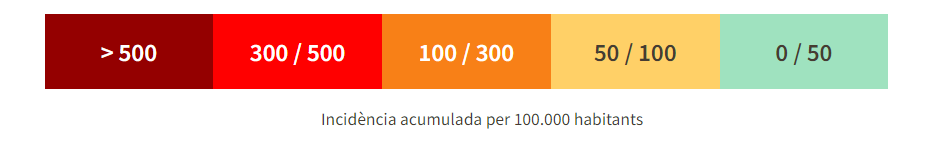

In [ ]:
findes = []
for i in range(len(df.fecha)):
  # Obtenemos la fecha 
  fecha = df.fecha[i]
  findes.append(dic_findes.get(fecha))

In [ ]:
incidencia['fecha'] = incidencia['fecha'].apply(lambda x: str(x).split(' ')[0])

In [ ]:
# Diccionario
in_dic = dict(zip(incidencia.fecha, incidencia.Acumulats))

In [ ]:
val_acum = []
for i in range(len(df.fecha)):
  # Obtenemos la fecha 
  fecha = df.fecha[i]
  val_acum.append(dic_findes.get(fecha))

In [ ]:
prueba = df.merge(incidencia, on= 'fecha', how='left')
prueba

In [ ]:
aux = prueba.Acumulats.iloc[0]

In [ ]:
prueba

In [ ]:
val_acum = []
for i in range(len(prueba.fecha)):
  if prueba.fecha.iloc[i] in in_dic.keys():
    val_acum.append(in_dic.get(prueba.fecha.iloc[i]))
  else:
    val_acum.append(0)

In [ ]:
len(val_acum)

In [ ]:
prueba['Acumulats'] = val_acum

In [ ]:
prueba

In [ ]:
# Creamos una función para establecer los niveles de incidencia
def niveles(x):
  '''
  Función que filtra un valor del índice acumulado y establece el nivel de incidencia.
  '''

  if x == 0:
    res = 0
  elif x < 50:
    res = 1
  elif x >= 50 and x < 100:
    res = 2
  elif x >= 100 and x < 300:
    res = 3
  elif x >= 300 and x < 500:
    res = 4
  elif x >= 500:
    res = 5

  return res


In [ ]:
df_cleaned['Niveles'] = df_cleaned['Acumulats'].apply(niveles)

In [ ]:
df_cleaned['covid'] = df_cleaned['Acumulats'].apply(lambda x: 1 if x is not 0 else 0)

In [ ]:
df_cleaned.to_csv('df_cleaned.csv')

In [ ]:
df_cleaned

In [ ]:
hola = df_cleaned
hola

In [ ]:
hours = ["H01","H02","H03","H04","H05","H06","H07","H08","H09","H10","H11","H12","H13","H14","H15","H16","H17","H18","H19","H20","H21","H22","H23","H24"]

long_mediciones = pd.melt(hola, id_vars=['ESTACIO', 'CODI_CONTAMINANT', 'covid', 'fecha',	'festivo',	'findes',	'Acumulats',	'Niveles'], value_vars=hours)

long_mediciones


In [ ]:
#long_mediciones.to_csv('df_melt_mediciones.csv')

 # Last_Season

In [ ]:
import pandas as pd
data = pd.read_csv('df_melt_mediciones.csv')

In [ ]:
# Filtrar los contaminantes y los valores para determinar si hay o no contaminación.
data.CODI_CONTAMINANT.value_counts()

In [ ]:
dat_fil = data[-( (data['CODI_CONTAMINANT'] == 996) | (data['CODI_CONTAMINANT'] == 997) | (data['CODI_CONTAMINANT'] == 998) | (data['CODI_CONTAMINANT'] == 999) )]

In [ ]:
dat_fil.CODI_CONTAMINANT.value_counts()

In [ ]:
limp_Dat = dat_fil[-(dat_fil['value'].isna())]

In [ ]:
limp_Dat

In [ ]:
limp_Dat.CODI_CONTAMINANT.value_counts()

- El **carbono negro** (Black carbon - Etiqueta 22)  indica tráfico, pero no tiene un valor límite establecido según la normativa relativa a la calidad del aire ambiente. Sin embargo, sus medidas son un aporte importante en la evaluación de la calidad del aire ya quie son un bune indicador del tráfico. Su información es complementaria para la evaluación de la calidad del aire y la caracterización de las fuentes emisoras de los contaminados.

https://www.catalunyapress.es/texto-diario/mostrar/2799496/2020-cumplen-objetivos-calidad-aire-todas-zonas-cataluna

In [ ]:
# Eliminamos las etiquetas correspondientes al Black carbon
limp_Dat = limp_Dat[- (limp_Dat['CODI_CONTAMINANT'] == 22) ]

In [ ]:
limp_Dat

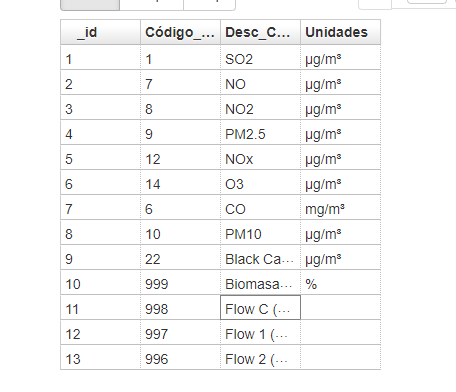

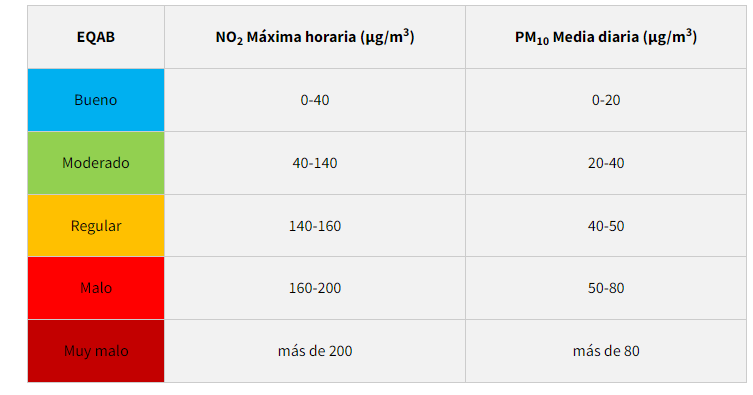

https://mediambient.gencat.cat/es/05_ambits_dactuacio/atmosfera/index.html

https://ajuntament.barcelona.cat/qualitataire/es/qualitat-de-laire/com-es-lluita-contra-la-contaminacio/la-red-de-vigilancia-y-prevision-de-la

https://ajuntament.barcelona.cat/qualitataire/es/la-contaminacio/otros-contaminantes


https://mediambient.gencat.cat/ca/05_ambits_dactuacio/atmosfera/qualitat_de_laire/vols-saber-que-respires/



In [ ]:
def contaminantes(tipo, valor):
  '''
  Función que analice el nivel de cada contaminante y devuelva si es un valor perjudicial o no.
  1: Perjudicial
  0 ; No perjudicial
  '''
  res = 0

  # 1 - SO2 [ug/m2] es cont > 125
  if tipo == 1 and valor >=125:
    res = 1

  # 6 - C0 [ug/m2] es cont > 34
  elif tipo == 6 and valor >= 34:
    res = 1

  # 7 - NO [ug/m2] es cont >= 40
  elif tipo == 7 and valor >= 40:
    res = 1

  # 8 - NO2 [ug/m2] es cont >= 160
  elif tipo == 8 and valor >= 160:
    res = 1

  # 9 - PM 2,5 [ug/m2] es cont >= 25
  elif tipo == 9 and valor >= 25:
    res = 1

  # 10 - PM10 [ug/m2] es cont >= 50
  elif tipo == 10 and valor >= 50:
    res = 1

  # 12 - NOx [ug/m2] es cont >= 30
  elif tipo == 12 and valor >= 30:
    res = 1

  # 14 - O3 [ug/m2] es cont >= 110
  elif tipo == 14 and valor >= 110:
    res = 1

  return res

In [ ]:
cont_perj = []
for i in range(len(limp_Dat)):
  aux = contaminantes(limp_Dat.CODI_CONTAMINANT.iloc[i], limp_Dat.value.iloc[i])
  cont_perj.append(aux)

In [ ]:
limp_Dat['Perjudicial'] = cont_perj

In [ ]:
limp_Dat = limp_Dat.drop(columns=['Unnamed: 0'])

In [ ]:
limp_Dat

In [ ]:
# Guardamos los cambios realizados
limp_Dat.to_csv('dataModel.csv')

# Preprocesing 

In [ ]:
data = pd.read_csv('dataModel.csv')

In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data